## PROJECT OBJECTIVE

In this checkpoint, the objective is to work on the '5G-Energy consumption' dataset that was provided by the International Telecommunication Union (ITU) in 2023 as part of a global challenge or competition for data scientists all over the world to solve the 5G energy consumption modeling using machine learning techniques.

### Importing neccssary libraries

In [180]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [181]:
#Import you data and perform basic data exploration phase
data = pd.read_csv("5G_energy_consumption_dataset.csv")

data

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...,...
92624,20230102 170000,B_1018,14.648729,0.087538,0.0,7.325859
92625,20230102 180000,B_1018,14.648729,0.082635,0.0,7.325859
92626,20230102 210000,B_1018,13.452915,0.055538,0.0,7.325859
92627,20230102 220000,B_1018,13.602392,0.058077,0.0,7.325859


## DATA EXPLORATION

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [183]:
#first five rows of the data
print(data.head())


#last five rows od the data
print(data.tail())

              Time   BS     Energy      load  ESMODE   TXpower
0  20230101 010000  B_0  64.275037  0.487936     0.0  7.101719
1  20230101 020000  B_0  55.904335  0.344468     0.0  7.101719
2  20230101 030000  B_0  57.698057  0.193766     0.0  7.101719
3  20230101 040000  B_0  55.156951  0.222383     0.0  7.101719
4  20230101 050000  B_0  56.053812  0.175436     0.0  7.101719
                  Time      BS     Energy      load  ESMODE   TXpower
92624  20230102 170000  B_1018  14.648729  0.087538     0.0  7.325859
92625  20230102 180000  B_1018  14.648729  0.082635     0.0  7.325859
92626  20230102 210000  B_1018  13.452915  0.055538     0.0  7.325859
92627  20230102 220000  B_1018  13.602392  0.058077     0.0  7.325859
92628  20230102 230000  B_1018  13.303438  0.048173     0.0  7.325859


In [184]:
#shape of the data
data.shape

(92629, 6)

In [185]:
#checking the columns
data.columns.tolist()

['Time', 'BS', 'Energy', 'load', 'ESMODE', 'TXpower']

In [186]:
#Create a pandas profiling reports to gain insights into the dataset
from ydata_profiling import ProfileReport

Data_profile = ProfileReport(data, title = 'Data_Report')

Data_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### INSIGHT GENERATED

1. There are no missing rows
2. There are no duplicate rows
3. There are 4 numerical columns and 2 object columns
4. Looking at the heatmap for corelation, we can see that there is positve corelation between energy and load with value of 0.69.


### Checking missing values

In [187]:
data.isnull().sum()

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64

### No missing values

### Checking for duplicates


In [188]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
92624    False
92625    False
92626    False
92627    False
92628    False
Length: 92629, dtype: bool

In [189]:
#making a copy of the dataset
data1 = data.copy()

data1

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...,...
92624,20230102 170000,B_1018,14.648729,0.087538,0.0,7.325859
92625,20230102 180000,B_1018,14.648729,0.082635,0.0,7.325859
92626,20230102 210000,B_1018,13.452915,0.055538,0.0,7.325859
92627,20230102 220000,B_1018,13.602392,0.058077,0.0,7.325859


## SUMMARY STATISTICAL INFORMATION

In [190]:
data1.describe()

,Energy,load,ESMODE,TXpower
count,92629.000000,92629.000000,92629.000000,92629.000000
mean,28.138997,0.244705,0.081361,6.765427
std,13.934645,0.234677,0.382317,0.309929
min,0.747384,0.000000,0.000000,5.381166
25%,18.236173,0.057370,0.000000,6.427504
50%,24.065770,0.165550,0.000000,6.875934
75%,35.724963,0.363766,0.000000,6.875934
max,100.000000,0.993957,4.000000,8.375336


### We can check the difference between the mean and the 50% to check for presence of outliers. 

## DATA PREPROCESSING

In [191]:
# select numerical variables
numerical_variables = data1.select_dtypes(include = ['float', 'int64']).columns.tolist()
print(numerical_variables)

# value counts for numerical variables
for column in numerical_variables:
    print(data1[column].value_counts())

['Energy', 'load', 'ESMODE', 'TXpower']
Energy
17.937220    1014
17.787743     921
18.236173     898
18.385650     895
18.086697     889
             ... 
98.355755       1
85.650224       1
97.010463       1
96.711510       1
96.412556       1
Name: count, Length: 612, dtype: int64
load
0.008260    71
0.008240    71
0.045923    70
0.008270    55
0.008300    49
            ..
0.569074     1
0.610043     1
0.285777     1
0.467277     1
0.058077     1
Name: count, Length: 58563, dtype: int64
ESMODE
0.000000    87475
2.000000     1299
1.999722      226
0.002500      134
0.000556      122
            ...  
0.378611        1
1.805833        1
1.467778        1
0.317500        1
0.983333        1
Name: count, Length: 1713, dtype: int64
TXpower
6.875934    40444
6.427504    26693
7.100897    13277
7.101719     2523
6.876682     1445
6.128550      986
7.325859      879
5.979073      781
6.651719      673
8.034529      342
6.726457      336
6.576981      332
5.680120      329
6.727205      325


In [192]:
# select categorical variables
categorical_variables = data1.select_dtypes(include = ['object']).columns.tolist()
print(categorical_variables)

# value counts for categorical variables
for column in categorical_variables:
    print(data1[column].value_counts())

['Time', 'BS']
Time
20230102 230000    766
20230102 180000    759
20230102 210000    757
20230102 020000    756
20230102 000000    756
                  ... 
20230107 170000    161
20230107 010000    151
20230107 160000    149
20230107 130000    140
20230108 000000     42
Name: count, Length: 168, dtype: int64
BS
B_583     130
B_261     128
B_728     128
B_669     128
B_512     126
         ... 
B_1018     16
B_921      14
B_905      13
B_854       1
B_835       1
Name: count, Length: 923, dtype: int64


### From our exploration, our Time column is in "object data type", we can change it to DataTime format 

In [193]:
#changing the datatype of Time column
data1["Time"] = pd.to_datetime(data1["Time"])


data1

,Time,BS,Energy,load,ESMODE,TXpower
0,2023-01-01 01:00:00,B_0,64.275037,0.487936,0.0,7.101719
1,2023-01-01 02:00:00,B_0,55.904335,0.344468,0.0,7.101719
2,2023-01-01 03:00:00,B_0,57.698057,0.193766,0.0,7.101719
3,2023-01-01 04:00:00,B_0,55.156951,0.222383,0.0,7.101719
4,2023-01-01 05:00:00,B_0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...,...
92624,2023-01-02 17:00:00,B_1018,14.648729,0.087538,0.0,7.325859
92625,2023-01-02 18:00:00,B_1018,14.648729,0.082635,0.0,7.325859
92626,2023-01-02 21:00:00,B_1018,13.452915,0.055538,0.0,7.325859
92627,2023-01-02 22:00:00,B_1018,13.602392,0.058077,0.0,7.325859


## DATA VISUALIZATION (EXPLORATORY BEFORE RUNNING OUR MODEL)

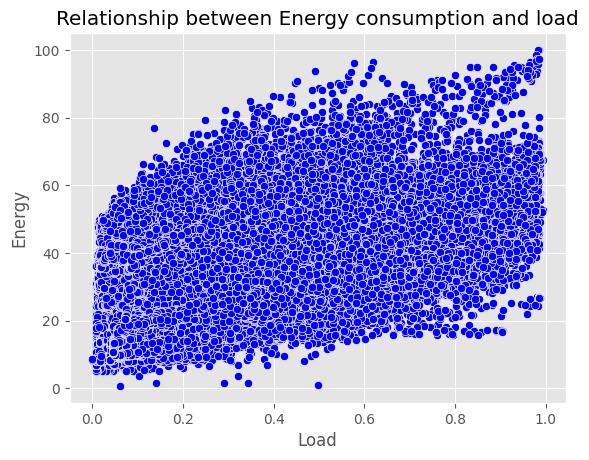

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
##creating scattered plot 
sns.scatterplot(data1, x="load", y="Energy", color = "blue")

# Set title and axis labels
plt.title('Relationship between Energy consumption and load')
plt.xlabel('Load')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

### INSIGHT GENERATED FROM THE GRAPH

1. From the graph, we can see that there is a positive correlation between the load and energy consumption.
2. The points are clustered together, indicating a correlation between the load and energy.
3. The tighter the points are clustered, the stronger the correlation.
4. The higher the load that is, as the load increases, the energy consumed tend to increase.

In [195]:
#We can use correlation coefficient to show the correlation using numpy 
correlation = np.corrcoef(data1["load"], data1["Energy"])[0, 1]
print('Correlation Coefficient:', correlation)

Correlation Coefficient: 0.6430222078201501


### From our result, we can see a strong positive corelation. 

In [196]:
#creating a sample of the dataset
data2 = data1.iloc[0:100, 0:3]

data2

,Time,BS,Energy
0,2023-01-01 01:00:00,B_0,64.275037
1,2023-01-01 02:00:00,B_0,55.904335
2,2023-01-01 03:00:00,B_0,57.698057
3,2023-01-01 04:00:00,B_0,55.156951
4,2023-01-01 05:00:00,B_0,56.053812
...,...,...,...
95,2023-01-06 03:00:00,B_0,55.605381
96,2023-01-06 04:00:00,B_0,52.017937
97,2023-01-06 05:00:00,B_0,53.662182
98,2023-01-06 07:00:00,B_0,80.866966


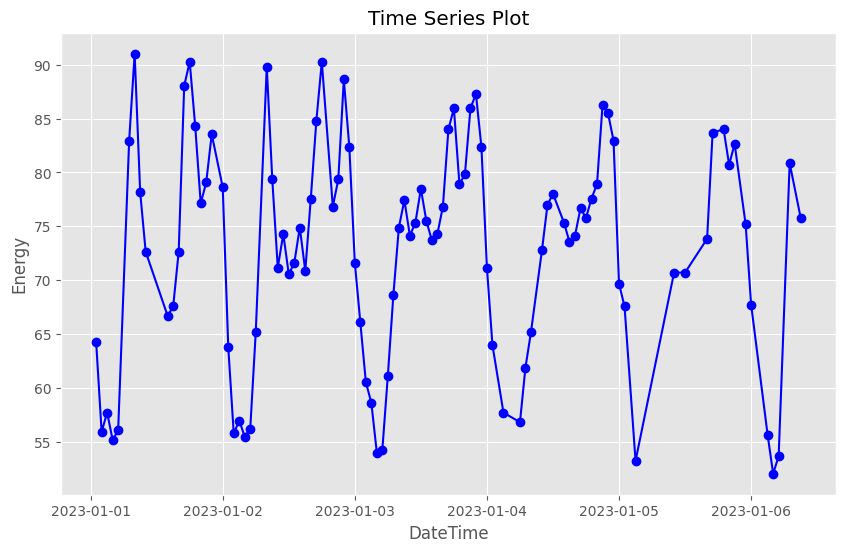

In [197]:
#Plotting time series
plt.figure(figsize=(10, 6))
plt.plot(data2['Time'], data2['Energy'], marker='o', color='b', linestyle='-')
plt.title('Time Series Plot')
plt.xlabel('DateTime')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

I took a sample of the dataset to visibly show the time-series fluctuation. The Time series shows the fluctuation of the energy consumption with time. The highest energy consumption is between 2023-01-01 and 2023-01-02 which is above 90.

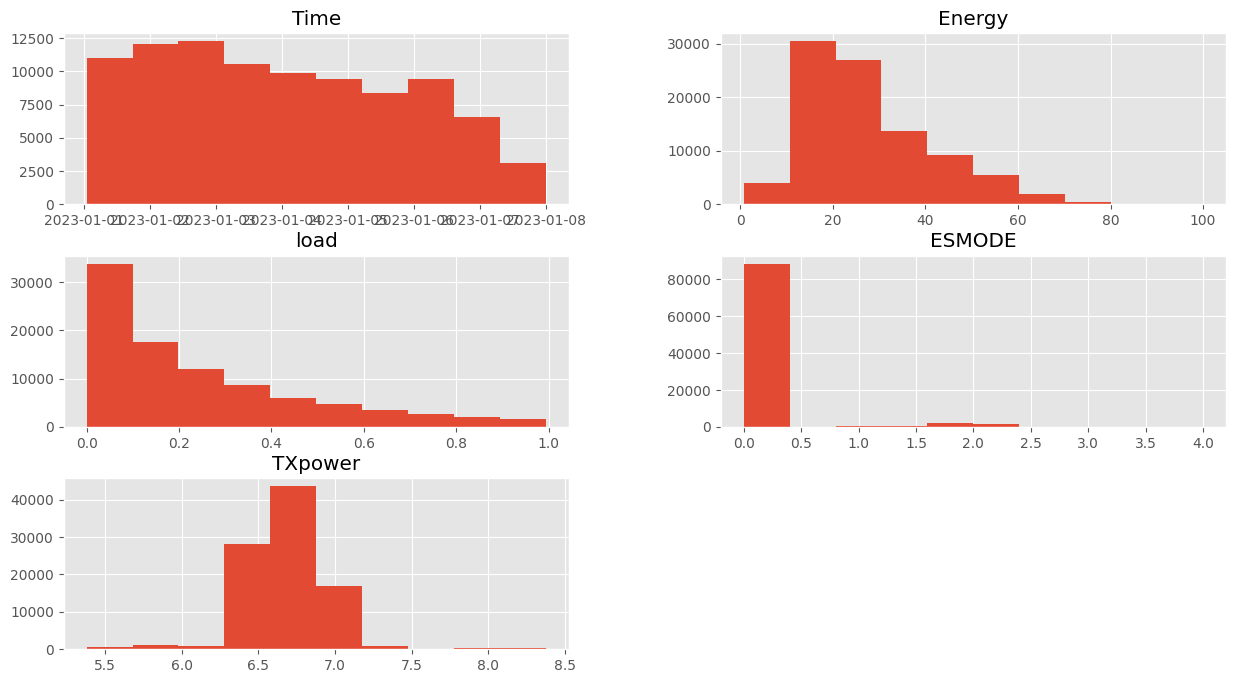

In [198]:
#showing the distribution of numeric columns 
data1.hist(figsize = (15,8));

In [199]:
# What BS have the lowest energy consumption?
lowest_energy_consumption= data1.groupby('BS')['Energy'].min().astype('int').sort_values(ascending = False)
lowest_energy_consumption

BS
B_0      52
B_77     52
B_79     51
B_112    51
B_392    50
         ..
B_531     1
B_528     1
B_530     1
B_529     0
B_527     0
Name: Energy, Length: 923, dtype: int32

<Axes: >

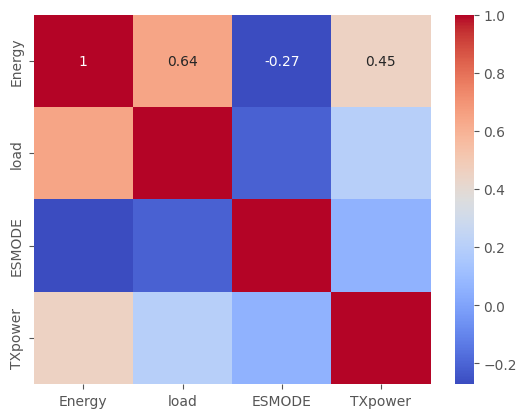

In [200]:
#creating heatmap to show corelation
sns.heatmap(data1.select_dtypes("number").corr(), cmap = "coolwarm", annot = True)

~ From our heatmap, we can see that there is a strong positive correlation between Energy and Load with a coefficient of 0.64 but there is also a correlation to the TXpower with a coefficient of 0.45 but it is low compared to Load. 

~ There is a negative correlation between energy and ESMODE meaning there is no relationship. 

~ We can deduce that load is a strong indicator to the increase in energy consumption. 

## DATA ENCODING

In [201]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     92629 non-null  datetime64[ns]
 1   BS       92629 non-null  object        
 2   Energy   92629 non-null  float64       
 3   load     92629 non-null  float64       
 4   ESMODE   92629 non-null  float64       
 5   TXpower  92629 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 4.2+ MB


We have to change our categorical data to numerical so that our model can understand our data. 

In [202]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data1["BS"] = encoder.fit_transform(data1["BS"])

data1.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,2023-01-01 01:00:00,0,64.275037,0.487936,0.0,7.101719
1,2023-01-01 02:00:00,0,55.904335,0.344468,0.0,7.101719
2,2023-01-01 03:00:00,0,57.698057,0.193766,0.0,7.101719
3,2023-01-01 04:00:00,0,55.156951,0.222383,0.0,7.101719
4,2023-01-01 05:00:00,0,56.053812,0.175436,0.0,7.101719


Our categorical column have been conveted to numerical

## FEATURE SELECTION 

In [203]:
X = data1.drop("Energy", axis = 1)

X.head()

,Time,BS,load,ESMODE,TXpower
0,2023-01-01 01:00:00,0,0.487936,0.0,7.101719
1,2023-01-01 02:00:00,0,0.344468,0.0,7.101719
2,2023-01-01 03:00:00,0,0.193766,0.0,7.101719
3,2023-01-01 04:00:00,0,0.222383,0.0,7.101719
4,2023-01-01 05:00:00,0,0.175436,0.0,7.101719


In [204]:
Y = data1.Energy

Y

0        64.275037
1        55.904335
2        57.698057
3        55.156951
4        56.053812
           ...    
92624    14.648729
92625    14.648729
92626    13.452915
92627    13.602392
92628    13.303438
Name: Energy, Length: 92629, dtype: float64

While exploring the data again, I noticed that the column for Time is in DataTime format so we have to convert it to float or int(numeric)

In [205]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X["Time"] = encoder.fit_transform(X["Time"])

X.head()

,Time,BS,load,ESMODE,TXpower
0,0,0,0.487936,0.0,7.101719
1,1,0,0.344468,0.0,7.101719
2,2,0,0.193766,0.0,7.101719
3,3,0,0.222383,0.0,7.101719
4,4,0,0.175436,0.0,7.101719


## TRAIN TEST SPLIT

In [206]:
from sklearn.model_selection import train_test_split

# split the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [207]:
#viewing our training and testing dataset
print(X_test.head(3))
print(Y_test.head(3))
print(X_train.head(3))
print(Y_train.head(3))

       Time   BS      load    ESMODE   TXpower
65601    33  553  0.372528  0.000000  7.100897
2220      5  129  0.013640  1.885278  6.875934
54370    47  442  0.079020  0.000000  6.427504
65601    44.843049
2220     20.478326
54370    13.751868
Name: Energy, dtype: float64
       Time   BS      load  ESMODE   TXpower
16510   139   61  0.074960     0.0  6.427504
43276   104  330  0.571149     0.0  6.875934
49707    85  396  0.856500     0.0  6.875934
16510    19.730942
43276    42.301943
49707    23.766816
Name: Energy, dtype: float64


## STANDARDIZATION

In [208]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_test_scaled = scaler.transform(X_test)


## MODELING(BUILDING AND EVALUATION)

I am going to make use of three regression model on our dataset to perform the regression task, then I will pick the best performing model.

The three models are:
1. Linear regression
2. Decision tree regression
3. Random forest regression



In [209]:
#importing the libaries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### LINEAR REGRESSION MODEL 

In [210]:
lr_model = LinearRegression()

# fit the the model
lr_model.fit(X_train_scaled, Y_train)

LinearRegression()

In [211]:
# create predictions
Y_pred = lr_model.predict(X_test_scaled)

Y_pred

array([37.81557598, 11.41878603, 17.92578806, ..., 15.61784891,
       20.40777508, 43.22276469])

In [212]:
# manually compare the energy comsumption.
print('Actual prices: ', Y.head().tolist())

print('Predicted prices: ', np.round(Y_pred[:5].tolist(), 2))

Actual prices:  [64.27503737, 55.90433483, 57.6980568, 55.15695067, 56.05381166]
Predicted prices:  [37.82 11.42 17.93 44.81 20.23]


### LINEAR REGRESSION MODEL EVALUATION

In [213]:
# model evaluation
linear_mse = mean_squared_error(Y_test, Y_pred)
linear_r2 = r2_score(Y_test, Y_pred)
linear_mae = mean_absolute_error(Y_test, Y_pred)
linear_rmse = mean_squared_error(Y_test, Y_pred, squared = False)

print('R2 of Linear Regression:', linear_r2.round(2))
print('MAE of Linear Regression:', linear_mae.round(2))
print('MSE of Linear Regression:', linear_mse.round(2))
print('RMSE of Linear Regression:', linear_rmse.round(2))

R2 of Linear Regression: 0.56
MAE of Linear Regression: 6.88
MSE of Linear Regression: 85.27
RMSE of Linear Regression: 9.23


### NOTE: The lower the MAE, MSE, RMSE, then the better the model's performance. The closer the r2_score (coefficient of determination) to 1, the better the model's performance. 

### DECISION TREE REGRESSION MODEL 

In [214]:
DT_model = DecisionTreeRegressor()

# fit the the model
DT_model.fit(X_train_scaled, Y_train)

DecisionTreeRegressor()

In [215]:
# create predictions
Y_pred = DT_model.predict(X_test_scaled)

Y_pred

array([49.0284006 , 23.01943199, 13.90134529, ..., 17.93721973,
       39.76083707, 33.03437967])

In [216]:
# Manually compare the energy consumption.
print('Actual prices: ', Y.head().tolist())

print('Predicted prices: ', np.round(Y_pred[:5].tolist(), 2))

Actual prices:  [64.27503737, 55.90433483, 57.6980568, 55.15695067, 56.05381166]
Predicted prices:  [49.03 23.02 13.9  55.16 38.12]


### DECISION TREE REGRESSOR MODEL EVALUATION

In [217]:
# model evaluation for DT
DT_mse = mean_squared_error(Y_test, Y_pred)
DT_r2 = r2_score(Y_test, Y_pred)
DT_mae = mean_absolute_error(Y_test, Y_pred)
DT_rmse = mean_squared_error(Y_test, Y_pred, squared = False)

print('R2 of DecisionTreeRegressor:', DT_r2.round(2))
print('MAE of DecisionTreeRegressor:', DT_mae.round(2))
print('MSE of DecisionTreeRegressor:', DT_mse.round(2))
print('RMSE of DecisionTreeRegressor:', DT_rmse.round(2))

R2 of DecisionTreeRegressor: 0.92
MAE of DecisionTreeRegressor: 2.46
MSE of DecisionTreeRegressor: 16.28
RMSE of DecisionTreeRegressor: 4.03


#### From our output, we can see that the Decision Tree Regressor is performing better than Linear regression with a higher R2 score and lower MAE, MSE, and RMSE.

### RANDOM FOREST REGRESSION MODEL

In [220]:
rf_model = RandomForestRegressor()

# fit the the model
rf_model.fit(X_train_scaled, Y_train)

RandomForestRegressor()

In [221]:
# create predictions
Y_pred = rf_model.predict(X_test_scaled)

In [222]:
# Manually compare the energy consumption.
print('Actual prices: ', Y.head().tolist())

print('Predicted prices: ', np.round(Y_pred[:5].tolist(), 2))

Actual prices:  [64.27503737, 55.90433483, 57.6980568, 55.15695067, 56.05381166]
Predicted prices:  [50.14 20.7  14.56 56.29 37.64]


### RANDOM FOREST REGRESSOR MODEL EVALUATION

In [223]:
# model evaluation for RF
RF_mse = mean_squared_error(Y_test, Y_pred)
RF_r2 = r2_score(Y_test, Y_pred)
RF_mae = mean_absolute_error(Y_test, Y_pred)
RF_rmse = mean_squared_error(Y_test, Y_pred, squared = False)

print('R2 of RandomForestRegressor:', RF_r2.round(2))
print('MAE of RandomForestRegressor:', RF_mae.round(2))
print('MSE of RandomForestRegressor:', RF_mse.round(2))
print('RMSE of RandomForestRegressor:', RF_rmse.round(2))

R2 of RandomForestRegressor: 0.95
MAE of RandomForestRegressor: 1.88
MSE of RandomForestRegressor: 8.8
RMSE of RandomForestRegressor: 2.97


#### From our output, we can see that the Random Forest Regressor performs better than the Linear regressor and Decision Tree Regressor with a higher R2 score of 0.95 and lower MAE, MSE, and RMSE of 1.88, 8.8 and 2.97 respectively. 

### *With R2 score of 0.95, it means that the model can explain 95% of the target variable(Y) by the independent variables(X).*

### *In conclusion, the Random Forest Regressor is the best-performing model that is, it has shown a better performance with R2_score of 0.95 and is a good fit of the model on the data compared to the other models.* 